<!-- -*- coding: utf-8 -*- -->
## Tutorial

This guide can help you start working with NetworkX.

### Creating a graph

Create an empty graph with no nodes and no edges.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G)

plt.show()

plt.clf()

In [2]:
import networkx as nx
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any hashable object e.g., a text string, an image, an XML object, another
Graph, a customized node object, etc.

# Nodes

The graph `G` can be grown in several ways.  NetworkX includes many graph
generator functions and facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations.  You can add one node
at a time,

In [3]:
G.add_node(1)

add a list of nodes,

In [4]:
G.add_nodes_from([2, 3])

or add any iterable container of nodes. You can also add nodes along with node
attributes if your container yields 2-tuples (node, node_attribute_dict).
Node attributes are discussed further below.

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)

Note that `G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

In [6]:
G.add_node(H)

The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.

# Edges

`G` can also be grown by adding one edge at a time,

In [7]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [8]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further below

In [9]:
G.add_edges_from(H.edges)

There are no complaints when adding existing nodes or edges. For example,
after removing all nodes and edges,

In [10]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are
already present.

In [11]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [12]:
G.number_of_nodes()
G.number_of_edges()

3

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data('span')`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [13]:
list(G.nodes)
list(G.edges)
list(G.adj[1])  # or list(G.neighbors(1))
G.degree[1]  # the number of edges incident to 1

2

One can specify to report the edges and degree from a subset of all nodes
using an *nbunch*. An *nbunch* is any of: None (meaning all nodes), a node,
or an iterable container of nodes that is not itself a node in the graph.

In [14]:
G.edges([2, 'm'])
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [15]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)

When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.

In [16]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

# What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX
objects.  This leaves you free to use meaningful items as nodes and
edges. The most common choices are numbers or strings, but a node can
be any hashable object (except `None`), and an edge can be associated
with any object `x` using `G.add_edge(n1, n2, object=x)`.

As an example, `n1` and `n2` could be protein objects from the RCSB Protein
Data Bank, and `x` could refer to an XML record of publications detailing
experimental observations of their interaction.

We have found this power quite useful, but its abuse
can lead to unexpected surprises unless one is familiar with Python.
If in doubt, consider using `convert_node_labels_to_integers()` to obtain
a more traditional graph with integer labels.

# Accessing edges and neighbors

In addition to the views `Graph.edges()`, and `Graph.adj()`,
access to edges and neighbors is possible using subscript notation.

In [17]:
G[1]  # same as G.adj[1]
G[1][2]
G.edges[1, 2]

{}

You can get/set the attributes of an edge using subscript notation
if the edge already exists.

In [18]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [19]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

In [20]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

## Graph attributes

Assign graph attributes when creating a new graph

In [21]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [22]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

# Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

In [23]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Note that adding a node to `G.nodes` does not add it to the graph, use
`G.add_node()` to add new nodes. Similarly for edges.

# Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [24]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the `networkx.drawing` module and will
be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [25]:
import matplotlib.pyplot as plt

You may find it useful to interactively test code using `ipython -pylab`,
which combines the power of ipython and matplotlib and provides a convenient
interactive mode.

To test if the import of `networkx.drawing` was successful draw `G` using one of

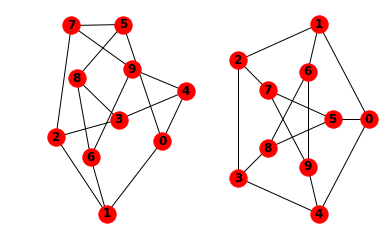

In [26]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

when drawing to an interactive display.  Note that you may need to issue a
Matplotlib

In [27]:
plt.show()

command if you are not using matplotlib in interactive mode (see
[Matplotlib FAQ](http://matplotlib.org/faq/installing_faq.html#matplotlib-compiled-fine-but-nothing-shows-up-when-i-use-it)
).

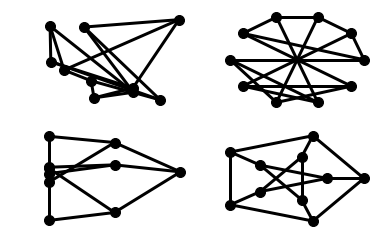

In [28]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and
layouts via `layout`.
You can use multiple shells with `draw_shell()`.

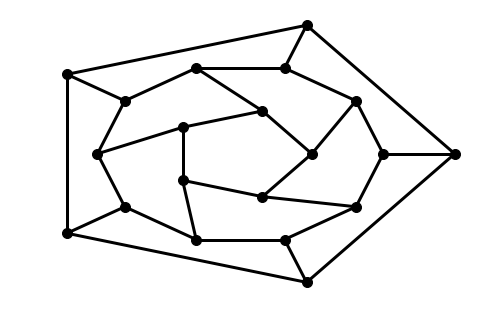

In [29]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

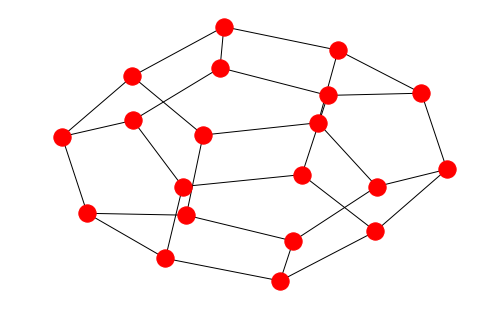

In [30]:
nx.draw(G)
plt.savefig("path.png")

# Adjacency Matrix

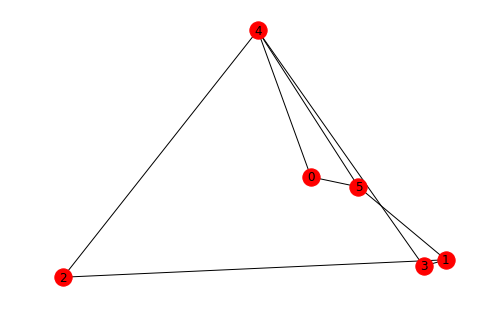

  (0, 4)	0.051197
  (0, 5)	1.343159
  (1, 2)	-0.6088082
  (1, 3)	0.4016954
  (1, 5)	0.6132168
  (2, 1)	-0.6088082
  (2, 4)	-0.6329541
  (3, 1)	0.4016954
  (3, 4)	-0.2983127
  (4, 0)	0.051197
  (4, 2)	-0.6329541
  (4, 3)	-0.2983127
  (4, 5)	0.15624584
  (5, 0)	1.343159
  (5, 1)	0.6132168
  (5, 4)	0.15624584


In [32]:
import numpy as np
A  =  [[0.000000,  0.0000000,  0.0000000,  0.0000000,  0.05119703, 1.3431599],
	   [0.000000,  0.0000000, -0.6088082,  0.4016954,  0.00000000, 0.6132168],
       [0.000000, -0.6088082,  0.0000000,  0.0000000, -0.63295415, 0.0000000],
       [0.000000,  0.4016954,  0.0000000,  0.0000000, -0.29831267, 0.0000000],
       [0.051197,  0.0000000, -0.6329541, -0.2983127,  0.00000000, 0.1562458],
       [1.343159,  0.6132168,  0.0000000,  0.0000000,  0.15624584, 0.0000000]]
 
G = nx.from_numpy_matrix(np.array(A)) 
nx.draw(G, with_labels=True)
plt.show()

print(nx.adjacency_matrix(G))

# Adjaceny List

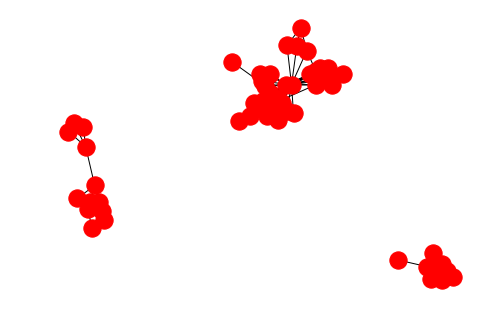

In [33]:
G = nx.Graph()
with open('egonet.txt') as f:
    for line in f:
        x,y = line.split()
        G.add_edge(int(x),int(y))
nx.draw(G)
plt.show()
plt.clf()

# Bokeh Plot

In [31]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

G=nx.karate_club_graph()

plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.spring_layout , scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)